# PROJECT : Stock Market Analysis and Prediction using ML

## Introduction

    Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data of few S&P 500 Companies.
   

### Libraries Used: 
    Numpy,Pandas,Matplotlib,Seaborn,Scikit Learn 
   

### Actions Performed: 
    Using the above python libraries, we have performed technical analysis i.e graphically presented moving averages of stocks, calculated Daily Returns and plotted them on graphs using visualization libraries. Later, we have predicted the future stock prices using three different models-Linear Regression, Decision Tree and Support Vector regression and also calculated the accuracy using mean-sqaured method.


### About the Dataset :
    It is the stock market data of Apple Inc. over the time period 04-01-2016 to 07-02-2018. Apple Inc. is an American multinational technology company headquartered in Cupertino, California, that designs, develops, and sells consumer electronics, computer software, and online services.
    The dataset contains following columns-:
        Date -> The particaular date on which the data is collected
        Open -> The opening price of the stock on that day
        High -> The highest price of the stock on that day
        Low  -> The lowest price of the stock on that day
        Close-> The closing price of the stock on that day
        Volume->The volume of stock traded on that day

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 7)

### Reading Dataset

In [3]:
df = pd.read_csv('AAPL_data.csv')
df['Date']=pd.to_datetime(df['Date'])

In [52]:
# Data Values in the dataset

print(df.head())
print('----')
print(df.tail())


         date     open     high      low    close     volume
0  08-02-2013  67.7142  68.4014  66.8928  67.8542  158168416
1  11-02-2013  68.0714  69.2771  67.6071  68.5614  129029425
2  12-02-2013  68.5014  68.9114  66.8205  66.8428  151829363
3  13-02-2013  66.7442  67.6628  66.1742  66.7156  118721995
4  14-02-2013  66.3599  67.3771  66.2885  66.6556   88809154
----
            date     open    high       low   close    volume
1254  01-02-2018  167.165  168.62  166.7600  167.78  47230787
1255  02-02-2018  166.000  166.80  160.1000  160.50  86593825
1256  05-02-2018  159.100  163.88  156.0000  156.49  72738522
1257  06-02-2018  154.830  163.72  154.0000  163.03  68243838
1258  07-02-2018  163.085  163.40  159.0685  159.54  51608580


In [5]:
# Dataset description i.e mean,standard deviation,count,maximum value etc

df.describe()

,Open,High,Low,Close,Volume
count,529.000000,529.000000,529.000000,529.000000,5.290000e+02
mean,129.625109,130.595307,128.704498,129.713639,3.302348e+07
std,26.970369,27.041367,26.812777,26.931340,1.568011e+07
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07
25%,106.000000,106.800000,105.210000,105.970000,2.331956e+07
50%,120.000000,120.450000,119.710000,120.000000,2.826944e+07
75%,154.010000,154.900000,153.330000,153.990000,3.751166e+07
max,179.370000,180.100000,178.250000,179.260000,1.333697e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
Date      529 non-null datetime64[ns]
Open      529 non-null float64
High      529 non-null float64
Low       529 non-null float64
Close     529 non-null float64
Volume    529 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 24.9 KB


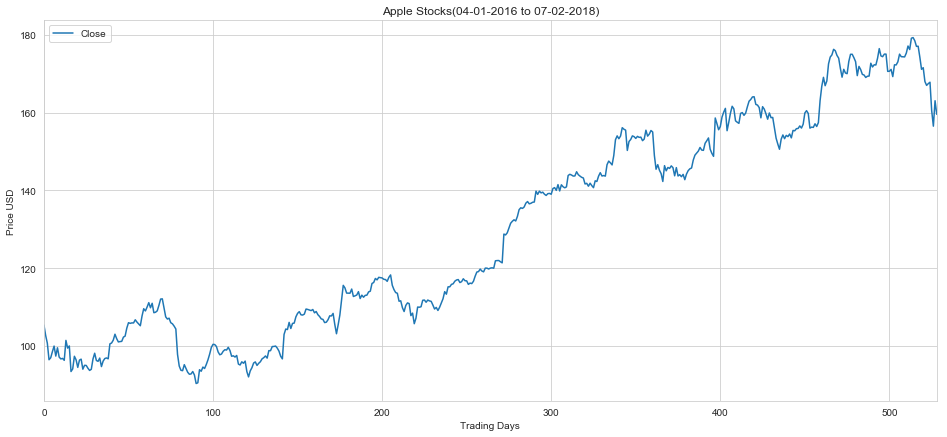

In [9]:
# Graphical representation of the closing price of the stock over time

df['Close'].plot(legend=True, figsize=(16,7))
plt.xlabel('Trading Days')
plt.ylabel('Price USD')
plt.title("Apple Stocks(04-01-2016 to 07-02-2018)")

plt.savefig('ClosingPrices.png')
plt.show()

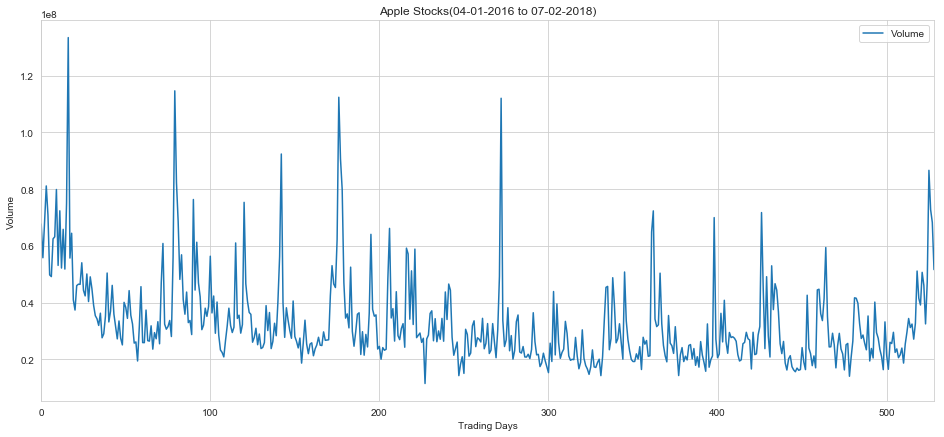

In [10]:
# Graphical representation of the Volume of the stock traded over time


df['Volume'].plot(legend=True, figsize=(16,7))
plt.xlabel('Trading Days')
plt.ylabel('Volume')
plt.title("Apple Stocks(04-01-2016 to 07-02-2018)")
plt.savefig('Volume.png')
plt.show()

# Moving Average of Stock

### Defintion: 
    The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses.

In [13]:
#Calculating Moving Average

ma_days=[10,20,50,100]

for ma in ma_days:
    Col_name="MA %s days"%(str(ma))
    df[Col_name]=pd.rolling_mean(df['Close'],ma)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  import sys
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  import sys
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  import sys
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  import sys


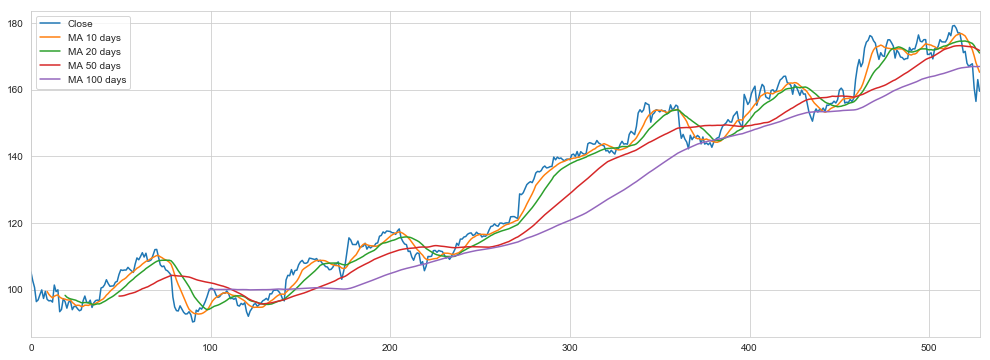

In [14]:
df[['Close','MA 10 days','MA 20 days','MA 50 days','MA 100 days']].plot(subplots=False,figsize=(17,6))
plt.savefig('MovingAverage.png')                                                                        

# Daily Return

### Definition:
    It is the calculation of how much you gained or lost per day of stock, subtract the opening price from the closing price.


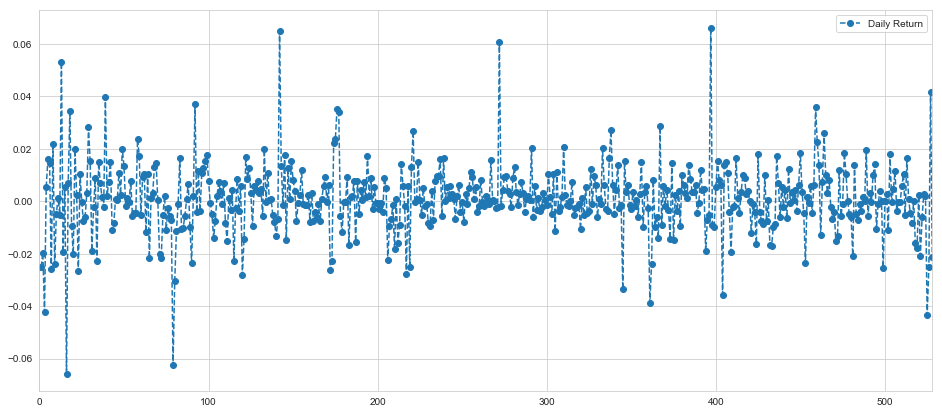

In [15]:
# We'll use pct_change to find the percent change for each day

df['Daily Return']= df['Close'].pct_change()

df['Daily Return'].plot(figsize=(16,7), legend=True, linestyle='--', marker='o')
plt.savefig('DailyReturn.png')

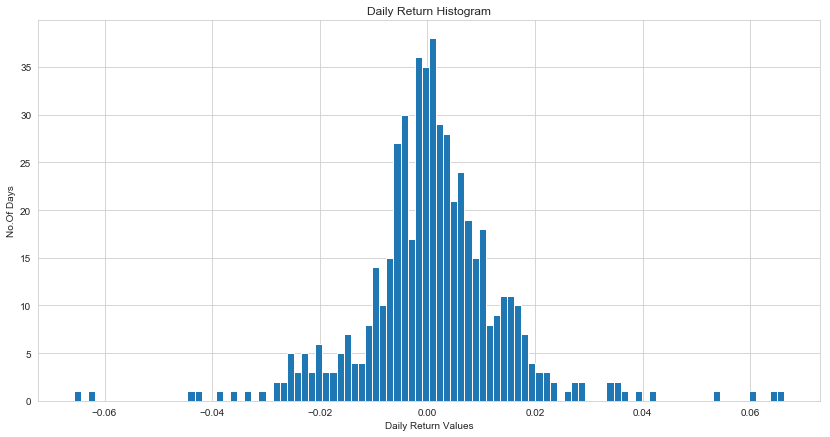

In [17]:
df['Daily Return'].hist(figsize=(14,7),bins=100)
plt.xlabel('Daily Return Values')
plt.ylabel('No.Of Days')
plt.title("Daily Return Histogram")
plt.show()

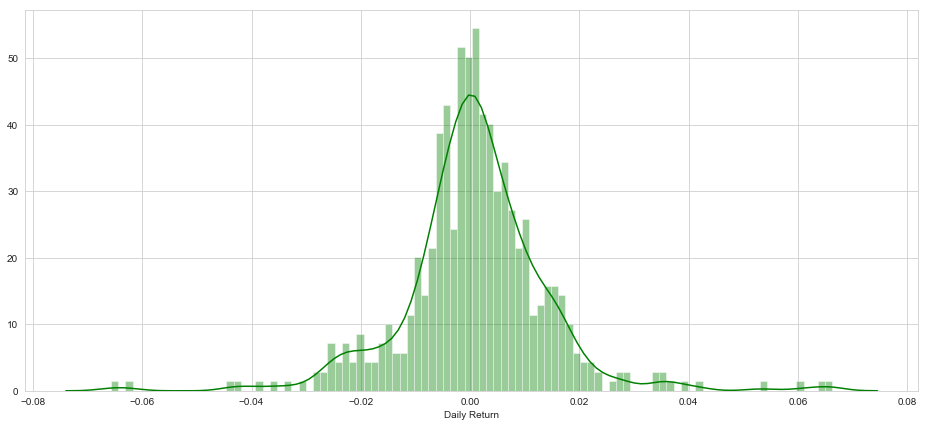

In [29]:
sns.distplot(df['Daily Return'].dropna(),bins=100,color='green')
plt.savefig('DailyReturn.png')

In [19]:
AAPL = pd.read_csv('AAPL_data.csv')
AMZN = pd.read_csv('AMZN_data.csv')
GOOGL = pd.read_csv('GOOGL_data.csv')
MSFT = pd.read_csv('MSFT_data.csv')

In [20]:
d = {'AAPL':AAPL['Close'],'AMZN':AMZN['close'],'MSFT':MSFT['close'],'GOOGL':GOOGL['close']}
closingprices_df = pd.DataFrame(d) 

In [21]:
closingprices_df.head(10)

,AAPL,AMZN,GOOGL,MSFT
0,105.35,636.99,759.44,54.80
1,102.71,633.79,761.53,55.05
2,100.70,632.65,759.33,54.05
3,96.45,607.94,741.00,52.17
4,96.96,607.05,730.91,52.33
5,98.53,617.74,733.07,52.30
6,99.96,617.89,745.34,52.78
7,97.39,581.81,719.57,51.64
8,99.52,593.00,731.39,53.11
9,97.13,570.18,710.49,50.99


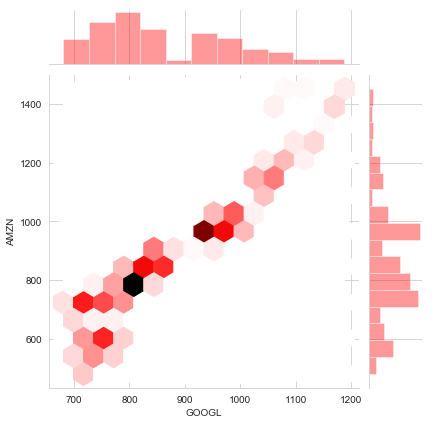

In [33]:
sns.jointplot(x='GOOGL',y='AMZN',data=closingprices_df,kind='hex',color='red')
plt.savefig('Jointplothex.png')

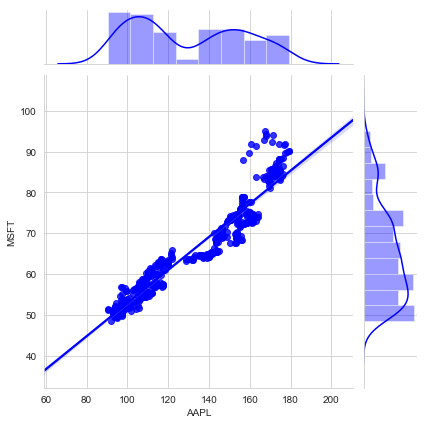

In [32]:
sns.jointplot(x='AAPL',y='MSFT',data=closingprices_df,kind='reg', color='blue')
plt.savefig('Jointplot.png')

In [24]:
comp_return = closingprices_df.pct_change()

In [25]:
comp_return.head(10)

,AAPL,AMZN,GOOGL,MSFT
0,NaN,NaN,NaN,NaN
1,-0.025059,-0.005024,0.002752,0.004562
2,-0.019570,-0.001799,-0.002889,-0.018165
3,-0.042205,-0.039058,-0.024140,-0.034783
4,0.005288,-0.001464,-0.013617,0.003067
5,0.016192,0.017610,0.002955,-0.000573
6,0.014513,0.000243,0.016738,0.009178
7,-0.025710,-0.058392,-0.034575,-0.021599
8,0.021871,0.019233,0.016426,0.028466
9,-0.024015,-0.038482,-0.028576,-0.039917


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


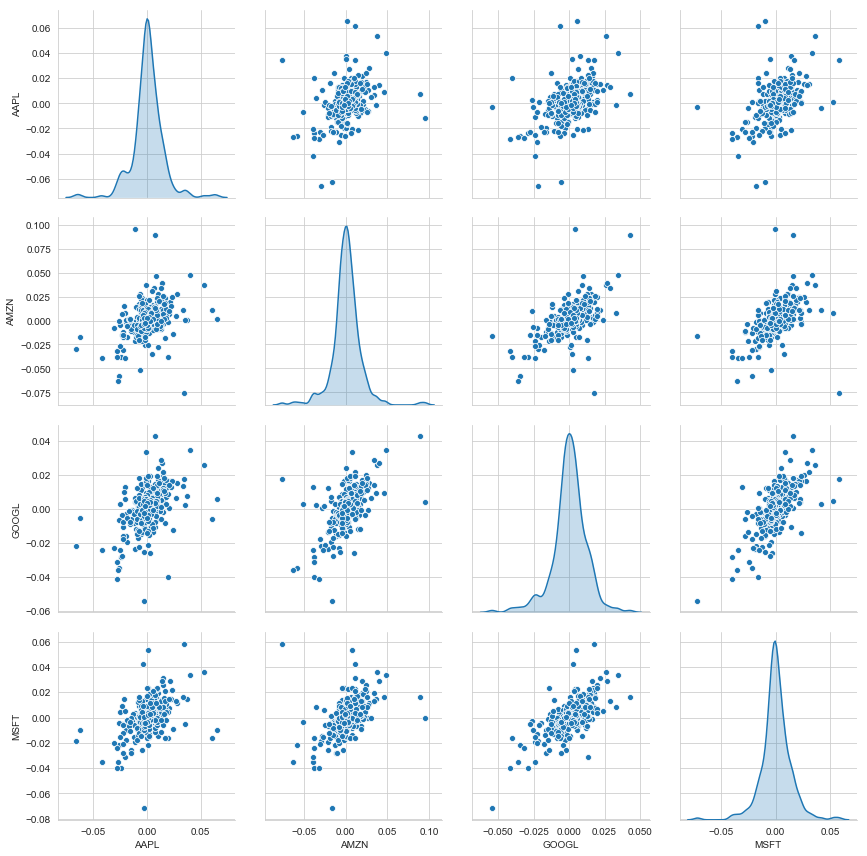

In [26]:
sns.pairplot(data=comp_return.dropna().head(300),size=3,kind='scatter',diag_kind='kde')
plt.savefig('Pairplot.png')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


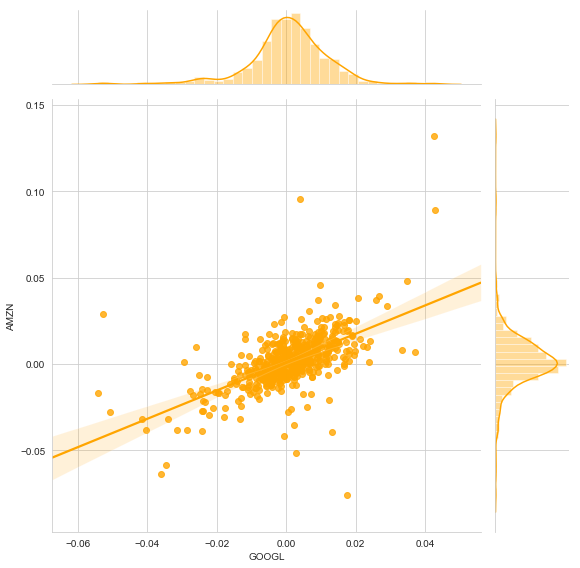

In [34]:
sns.jointplot(x='GOOGL',y='AMZN',data=comp_return.dropna(),kind='reg',color='orange',size=8)
plt.savefig('Jointplot3.png')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


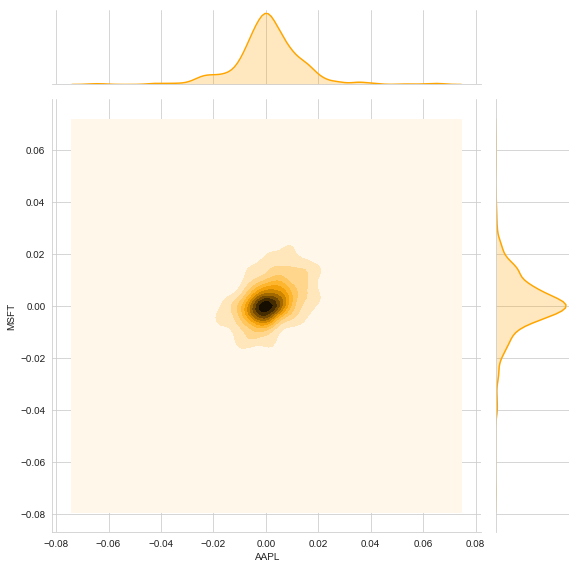

In [28]:
sns.jointplot(x='AAPL',y='MSFT',data=comp_return.dropna(),kind='kde', color='orange',size=8)

## Predicting Future Stock Prices

    Here, we will predict the closing prices of the stock using the open,high and low prices of the stock.

## Data Preprocessing

    Getting data ready for fitting into our models to get our prediction results

In [35]:
df = pd.read_csv("AAPL.csv")

In [36]:
#Dividing the dataset columns into X and y

X = df.iloc[:,1:4].values
y= df.iloc[:,4].values

y = y.reshape(-1,1)

## Standardisation

    The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.
    
    

    

    

In [37]:
# Using Standard Scaler Library for Standardisation

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_X.fit_transform(y)

## Train Test Split

    Here, we split our data into training and testing sets. We train our model on the training set data and the predictions are further done on the test set. We use Scikit Learns train_test_split for the same.

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

## Prediction Models

### Linear Regression

    In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).
    

In [39]:
from sklearn.linear_model import LinearRegression

regressor2 = LinearRegression()
regressor2.fit(X_train,y_train)
y_pred1 = regressor2.predict(X_test)
y_pred1 = sc_X.inverse_transform(y_pred1)
y_test1 = sc_X.inverse_transform(y_test)

In [40]:
print(y_pred1[1])
print(y_test1[1])

[ 126.72943407]
[ 126.92]


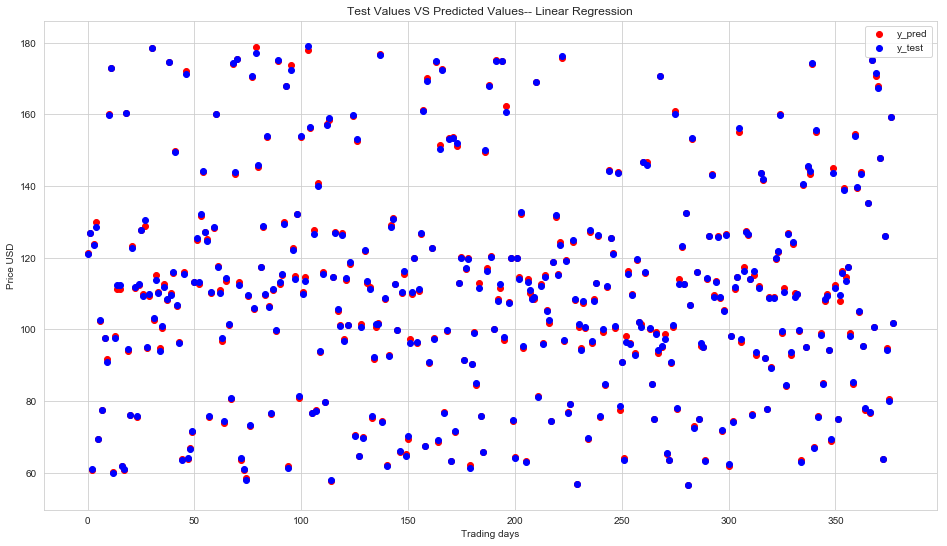

In [41]:
a= np.arange(0,378)    
plt.figure(figsize=(16,9))
plt.scatter(a,y_pred1,color='red')
plt.scatter(a,y_test1,color='blue')
plt.legend(labels=['y_pred','y_test'])
plt.ylabel('Price USD')
plt.xlabel('Trading days')
plt.title('Test Values VS Predicted Values-- Linear Regression')
plt.savefig('LR.png')
plt.show()

### Support Vector Regression

    Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. 

In [43]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf',epsilon=0.1)
regressor.fit(X_train,y_train)
y_pred2 = regressor.predict(X_test)
y_pred2 = sc_X.inverse_transform(y_pred2)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
print(y_pred2[1])
print(y_test1[1])

125.982280474
[ 126.92]


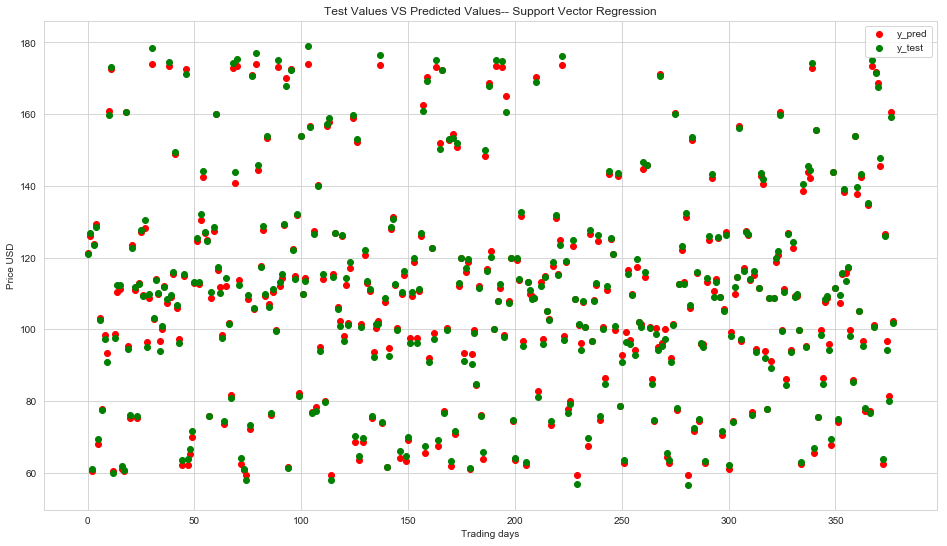

In [45]:
plt.figure(figsize=(16,9))
plt.scatter(a,y_pred2,color='red')
plt.scatter(a,y_test1,color='green')
plt.legend(labels=['y_pred','y_test'])
plt.ylabel('Price USD')
plt.xlabel('Trading days')
plt.title('Test Values VS Predicted Values-- Support Vector Regression')
plt.savefig('SVR.png')
plt.show()

### Decision Tree Regression
    
    Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. 

In [46]:
from sklearn.tree import DecisionTreeRegressor

regressor3 = DecisionTreeRegressor(random_state=0)
regressor3.fit(X_train,y_train)
y_pred3 = regressor3.predict(X_test)
y_pred3 = sc_X.inverse_transform(y_pred3)

In [47]:
print(y_pred3[1])
print(y_test1[1])

127.1
[ 126.92]


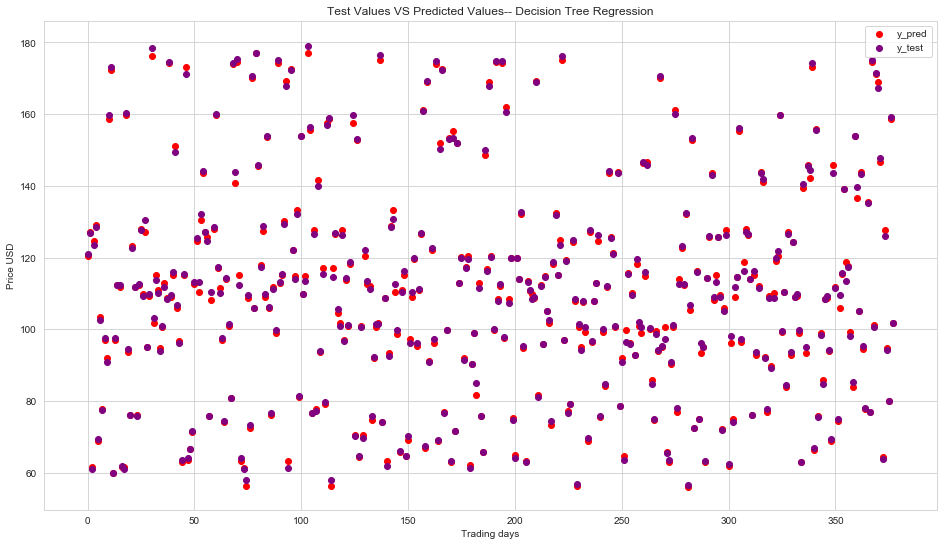

In [48]:
plt.figure(figsize=(16,9))
plt.scatter(a,y_pred3,color='red')
plt.scatter(a,y_test1,color='purple')
plt.legend(labels=['y_pred','y_test'])
plt.ylabel('Price USD')
plt.xlabel('Trading days')
plt.title('Test Values VS Predicted Values-- Decision Tree Regression')
plt.savefig('DTR.png')
plt.show()

### Prediction Scores

    

In [49]:
from sklearn.metrics import r2_score,mean_squared_error

print("Linear Regression :\t\t{}".format(r2_score(y_test1,y_pred1)))

print("Support Vector Regression: \t{}".format(r2_score(y_test1,y_pred2)))

print("Decision Tree Regression :  \t{}".format(r2_score(y_test1,y_pred3)))


Linear Regression :		0.9996938628208057
Support Vector Regression: 	0.9983546794613578
Decision Tree Regression :  	0.9988577962885473


# Thank You 